<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Цель проекта - Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 
Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Задачи проекта:

1. Загрузить и изучить данные, произвести EDA.
2. Произвести обучение моделей без учета дисбаланса. Оценить результаты метриками F1 и AUC-ROC.
3. Устранить дисбаланс тремя методами.
4. Произвести обучение моделей с сбалансированными данными.Оценить результаты метриками F1 и AUC-ROC.
5. Произвести финальное тестирование.Оценить результаты метриками F1 и AUC-ROC.

Признаки

•	RowNumber — индекс строки в данных

•	CustomerId — уникальный идентификатор клиента

•	Surname — фамилия

•	CreditScore — кредитный рейтинг

•	Geography — страна проживания

•	Gender — пол

•	Age — возраст

•	Tenure — сколько лет человек является клиентом банка

•	Balance — баланс на счёте

•	NumOfProducts — количество продуктов банка, используемых клиентом

•	HasCrCard — наличие кредитной карты

•	IsActiveMember — активность клиента

•	EstimatedSalary — предполагаемая зарплата

Целевой признак

•	Exited — факт ухода клиента



## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample,shuffle
import re
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/Churn.csv'

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB



Для удобства в дальнейшем анализе  названия столбцов привели в более читаемый стиль snake_case. Здесь мы используем регулярные выражения.


In [123]:
def convert_col(col):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower()
data.columns = map(convert_col, data.columns)


In [124]:
data.describe(include = "all")

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


делаем вывод, что exited - целевой признак, 1 стоит если клиент ушел, 0 если остался

In [126]:
data=pd.get_dummies(data, columns=['geography', 'gender'], drop_first=True)

перевели категеориальные признаки в численные через get_dummies

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_number         10000 non-null  int64  
 1   customer_id        10000 non-null  int64  
 2   surname            10000 non-null  object 
 3   credit_score       10000 non-null  int64  
 4   age                10000 non-null  int64  
 5   tenure             9091 non-null   float64
 6   balance            10000 non-null  float64
 7   num_of_products    10000 non-null  int64  
 8   has_cr_card        10000 non-null  int64  
 9   is_active_member   10000 non-null  int64  
 10  estimated_salary   10000 non-null  float64
 11  exited             10000 non-null  int64  
 12  geography_Germany  10000 non-null  uint8  
 13  geography_Spain    10000 non-null  uint8  
 14  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(8), object(1), uint8(3)
memory usage: 966.9+ KB


In [128]:
data.isna().sum()

row_number             0
customer_id            0
surname                0
credit_score           0
age                    0
tenure               909
balance                0
num_of_products        0
has_cr_card            0
is_active_member       0
estimated_salary       0
exited                 0
geography_Germany      0
geography_Spain        0
gender_Male            0
dtype: int64

In [129]:
data.tenure.isnull().sum()

909

In [130]:
data.tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [131]:
data['tenure'].fillna(0, inplace=True)

In [132]:
data.tenure.isnull().sum()

0

Были еще и  такие варианты работы с пропусками:

1. Распределение по годам использования банка практически ровное, если сейчас заменить 909 пропусков медианой, то мы увеличим в 2 раза значение для 5 лет. Это кажется некорректным. Можно сделать заполнение пропусков случайными числами, тогда мы снизим влияние на наше распределение.

2. Так как значений в этом признаке ограниченное количество, можно сделать его категориальным признаком. Пропуски можно считать как за отдельную категорию (заполнить значением -1). Затем заменить тип данных Tenure на object и применить технику OHE.

3. Заполнить "0", считая, что это новые клиенты.

В нашем случае, я принял решение считать что это новые клиенты и заполнил всё нулями.

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_number         10000 non-null  int64  
 1   customer_id        10000 non-null  int64  
 2   surname            10000 non-null  object 
 3   credit_score       10000 non-null  int64  
 4   age                10000 non-null  int64  
 5   tenure             10000 non-null  float64
 6   balance            10000 non-null  float64
 7   num_of_products    10000 non-null  int64  
 8   has_cr_card        10000 non-null  int64  
 9   is_active_member   10000 non-null  int64  
 10  estimated_salary   10000 non-null  float64
 11  exited             10000 non-null  int64  
 12  geography_Germany  10000 non-null  uint8  
 13  geography_Spain    10000 non-null  uint8  
 14  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(8), object(1), uint8(3)
memory usage: 966.9+ KB


In [135]:
data.isna().sum()

row_number           0
customer_id          0
surname              0
credit_score         0
age                  0
tenure               0
balance              0
num_of_products      0
has_cr_card          0
is_active_member     0
estimated_salary     0
exited               0
geography_Germany    0
geography_Spain      0
gender_Male          0
dtype: int64

In [136]:
data.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

видим , что датасет не сбалансирован, класса 1 намного меньше чем класса 0

In [138]:
target = data['exited']
features = data.drop(['exited','row_number','customer_id','surname'] , axis=1)

In [139]:
# разобьем на обучение, тест и валидацию 60:20:20

# выделяем обучение
features_train, features_rem, target_train, target_rem = train_test_split(features,target, train_size=0.6)

 
# остаток разбиваем на тест и валидацию

features_valid, features_test, target_valid, target_test = train_test_split(features_rem,target_rem, test_size=0.5)

In [140]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [141]:
#промасштабируем численные признаки
scaler = StandardScaler()
scaler.fit(features_train) 

StandardScaler()

In [142]:
pd.options.mode.chained_assignment = None

In [143]:
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid) 
features_test_scaled = scaler.transform(features_valid) 

In [144]:
features_train_scaled

array([[ 0.77873071,  0.67812923, -1.45007289, ..., -0.56605877,
        -0.58145592,  0.90331646],
       [ 0.36353776, -1.78998145, -0.16630184, ..., -0.56605877,
        -0.58145592,  0.90331646],
       [ 1.59873679,  3.05131259,  1.11746921, ..., -0.56605877,
        -0.58145592, -1.10703175],
       ...,
       [-0.26963149, -1.50519945,  0.47558368, ..., -0.56605877,
         1.71982082, -1.10703175],
       [-0.74710339,  1.91218458,  1.75935473, ..., -0.56605877,
        -0.58145592,  0.90331646],
       [-1.54634982,  1.72232991,  1.75935473, ..., -0.56605877,
        -0.58145592,  0.90331646]])


Для линейных моделей оптимально выполнить масштабирование численных признаков. Сделали это сразу после разбиения данных. Scaler обучили на тренировочной выборке, затем по очереди применили стандартизацию ко всем выборкам.


## Исследование задачи

### Логистическая регрессия

In [145]:
model_LR = LogisticRegression (random_state = 12345, solver = 'lbfgs',max_iter=100000)
model_LR.fit(features_train_scaled, target_train)

LogisticRegression(max_iter=100000, random_state=12345)

In [146]:
predictions_valid = model_LR.predict(features_valid_scaled)

print(f1_score(target_valid, predictions_valid ))


0.27478260869565213


In [147]:

probabilities_valid = model_LR.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7727437102124226


f1 низкий из-за дисбаланса, но благодаря нормализации модель справилась хорошо, и auc-roc довольно неплох!

### Дерево решений

In [148]:
best_f1=0
best_max_depth=0
best_model_tree=None
for depth in range(1,25):
    model=DecisionTreeClassifier(max_depth=depth,random_state=12345)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    #print("max_depth =", depth, ": ", end='')
    f1=f1_score(target_valid, predictions_valid)
    #print(f1) 
    if f1>best_f1:
        best_model_tree=model
        best_max_depth=depth
        best_f1=f1
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(f'Наилучшее дерево решений найдено, его оценка f1 составляет {round(best_f1,3)},', 
      f'AUC ROC составляет {round(auc_roc,3)} и макс глубина = {best_max_depth}')


Наилучшее дерево решений найдено, его оценка f1 составляет 0.57, AUC ROC составляет 0.83 и макс глубина = 5


Вывод - дерево решений сработало лучше  чем линейная модель

### Случайный лес

In [149]:
%%time
#сделаем через GridSearch
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_train, target_train)

CPU times: user 7min 43s, sys: 2.61 s, total: 7min 46s
Wall time: 7min 46s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [150]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 40}

In [151]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=40)

In [152]:
pred_valid= grid.best_estimator_.predict(features_valid)

In [153]:

print(f1_score(target_valid, predictions_valid ))

0.5164212910532276


In [154]:
probabilities_valid = grid.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8611857602130606


Вывод - дисбаланс сильно влияет на качество моделей, наилучший результат пока у случайного леса, f1 тут составляет 0.51 и AUC_ROC составле 0.86, также был опробован случайный лес и логрег, результаты у них примерно одинаковые

## Борьба с дисбалансом

### Взвешивание классов

In [155]:
model_LR = LogisticRegression (random_state = 12345, solver = 'lbfgs',max_iter=100000,class_weight='balanced')
model_LR.fit(features_train_scaled, target_train)

LogisticRegression(class_weight='balanced', max_iter=100000, random_state=12345)

In [156]:
predictions_valid = model_LR.predict(features_valid_scaled)

print(f1_score(target_valid, predictions_valid ))

0.5205479452054794


In [157]:

probabilities_valid = model_LR.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.777660387633287


Результат после взвешивания классов - у логрега f1 повысилась почти в 2 раза! AUC ROC остался прежним

In [158]:
best_f1=0
best_max_depth=0
best_model_tree=None
for depth in range(1,25):
    model=DecisionTreeClassifier(max_depth=depth,random_state=12345,class_weight='balanced')
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    #print("max_depth =", depth, ": ", end='')
    f1=f1_score(target_valid, predictions_valid)
    #print(f1) 
    if f1>best_f1:
        best_model_tree=model
        best_max_depth=depth
        best_f1=f1
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(f'Наилучшее дерево решений найдено, его оценка f1 составляет {round(best_f1,3)},', 
      f'AUC ROC составляет {round(auc_roc,3)} и макс глубина = {best_max_depth}')


Наилучшее дерево решений найдено, его оценка f1 составляет 0.614, AUC ROC составляет 0.806 и макс глубина = 9


После взвешивания у дерева решений результаты немного улучшились.

In [159]:
%%time
#сделаем через GridSearch
clf = RandomForestClassifier(class_weight='balanced')
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_train, target_train)

CPU times: user 7min 46s, sys: 2.31 s, total: 7min 48s
Wall time: 7min 52s


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [160]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [161]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=40)

In [162]:
pred_valid= grid.best_estimator_.predict(features_valid)

In [163]:

print(f1_score(target_valid, predictions_valid ))

0.511033681765389


In [164]:
probabilities_valid = grid.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8643141681710724


Вывод - Результаты случайного леса особо не увеличились

### Увеличение выборки

In [165]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0] # выделяем объекты с классом 0
    features_ones = features[target == 1] # с классов 1
    target_zeros = target[target == 0] # аналогично для датасета с таргетом
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # умножаем объекты класса 1 и соединяем датасеты
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) # аналогично для таргета
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) # перемешиваем объекты
    
    return features_upsampled, target_upsampled


In [166]:
# применяем функцию к тренировочному датасету, нам требуется увеличить количество объектом класса 1 в 4 раза с учетом дисбаланса
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

In [167]:
features_train_upsampled

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8794,706,29,1.0,209490.21,1,1,1,133267.69,0,1,0
6505,596,48,2.0,131326.47,1,0,0,1140.02,1,0,1
9877,505,33,3.0,106506.77,3,1,0,45445.78,1,0,0
1182,673,43,5.0,168069.73,1,1,1,146992.24,0,0,0
942,376,46,0.0,0.00,1,1,0,157333.69,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1115,479,48,5.0,87070.23,1,0,1,85646.41,0,1,1
3351,474,34,9.0,176311.36,1,1,0,160213.27,1,0,0
3053,601,34,5.0,0.00,2,1,0,27022.57,0,0,0
2776,689,39,7.0,0.00,2,0,0,14917.09,0,0,1


In [168]:
unique, counts = np.unique(target_train_upsampled, return_counts=True)
dict(zip(unique, counts))

{0: 4818, 1: 4728}

Функцию увеличения   выборки успешно применили на тренировочной выборке.


Решили не использовать функцию уменьшения выборки, данных и так не очень много



попробуем логрег

In [169]:
model_LR = LogisticRegression (random_state = 12345, solver = 'lbfgs',max_iter=100000)
model_LR.fit(features_train_upsampled, target_train_upsampled) 

LogisticRegression(max_iter=100000, random_state=12345)

In [170]:
predictions_valid = model_LR.predict(features_valid)

print(f1_score(target_valid, predictions_valid ))

probabilities_valid = model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.4628482972136223
0.7022495890951017


ну так себе! проверим модели дальше

In [171]:
best_f1=0
best_max_depth=0
best_model_tree=None
for depth in range(1,25):
    model=DecisionTreeClassifier(max_depth=depth,random_state=12345)
    model.fit(features_train_upsampled, target_train_upsampled)
    predictions_valid = model.predict(features_valid)
    #print("max_depth =", depth, ": ", end='')
    f1=f1_score(target_valid, predictions_valid)
   # print(f1) 
    if f1>best_f1:
        best_model_tree=model
        best_max_depth=depth
        best_f1=f1
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(f'Наилучшее дерево решений найдено, его оценка f1 составляет {round(best_f1,3)},', 
      f'AUC ROC составляет {round(auc_roc,3)} и макс глубина = {best_max_depth}')

Наилучшее дерево решений найдено, его оценка f1 составляет 0.62, AUC ROC составляет 0.811 и макс глубина = 9


и пальма первенства переходит дереву решений!!
глянем случайный лес

In [172]:
%%time
#попробую через GridSearch
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=3)
grid.fit(features_train_upsampled, target_train_upsampled)

CPU times: user 5min 37s, sys: 1.87 s, total: 5min 38s
Wall time: 5min 39s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [173]:
grid.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=50)

In [174]:
pred_valid= grid.best_estimator_.predict(features_valid)
print(f1_score(target_valid, predictions_valid ))

0.5255972696245734


In [175]:
probabilities_valid = grid.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.862738619104277


Вывод - после сбалансированности качество обучения значительно улучшилось, лучшие результаты показало дерево решений с максимальной глубиной 9 и f1 в 0.62

Исследовали два метода борьбы с дисбалансом данных: балансировка весов классов и увеличение выборки.

уменьшение выборки нет смысла брать, и так мало примеров.


## Тестирование модели

Соединим обучающие примеры и валидационные

In [176]:
features_train_all = pd.concat([features_train_upsampled] + [features_valid] ) # умножаем объекты класса 1 и соединяем датасеты
target_train_all = pd.concat([target_train_upsampled] + [target_valid] )

In [177]:
model=DecisionTreeClassifier(max_depth=9,random_state=12345)
model.fit(features_train_all, target_train_all)

DecisionTreeClassifier(max_depth=9, random_state=12345)

In [179]:
predictions_valid = model.predict(features_valid)
f1=f1_score(target_valid, predictions_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print(f'на валидационных примерах F1 составляет {f1}, AUC ROC составляет {auc_roc}')

на валидационных примерах F1 составляет 0.6612077789150461, AUC ROC составляет 0.893712126906152


Оценим на тестовом множестве

In [180]:
predictions_test = model.predict(features_test)
f1=f1_score(target_test, predictions_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc=roc_auc_score(target_test, probabilities_one_test)
print(f'F1 составляет {f1}, AUC ROC составляет {auc_roc}')

F1 составляет 0.5811965811965811, AUC ROC составляет 0.8010981875670489


Оценим важность фич

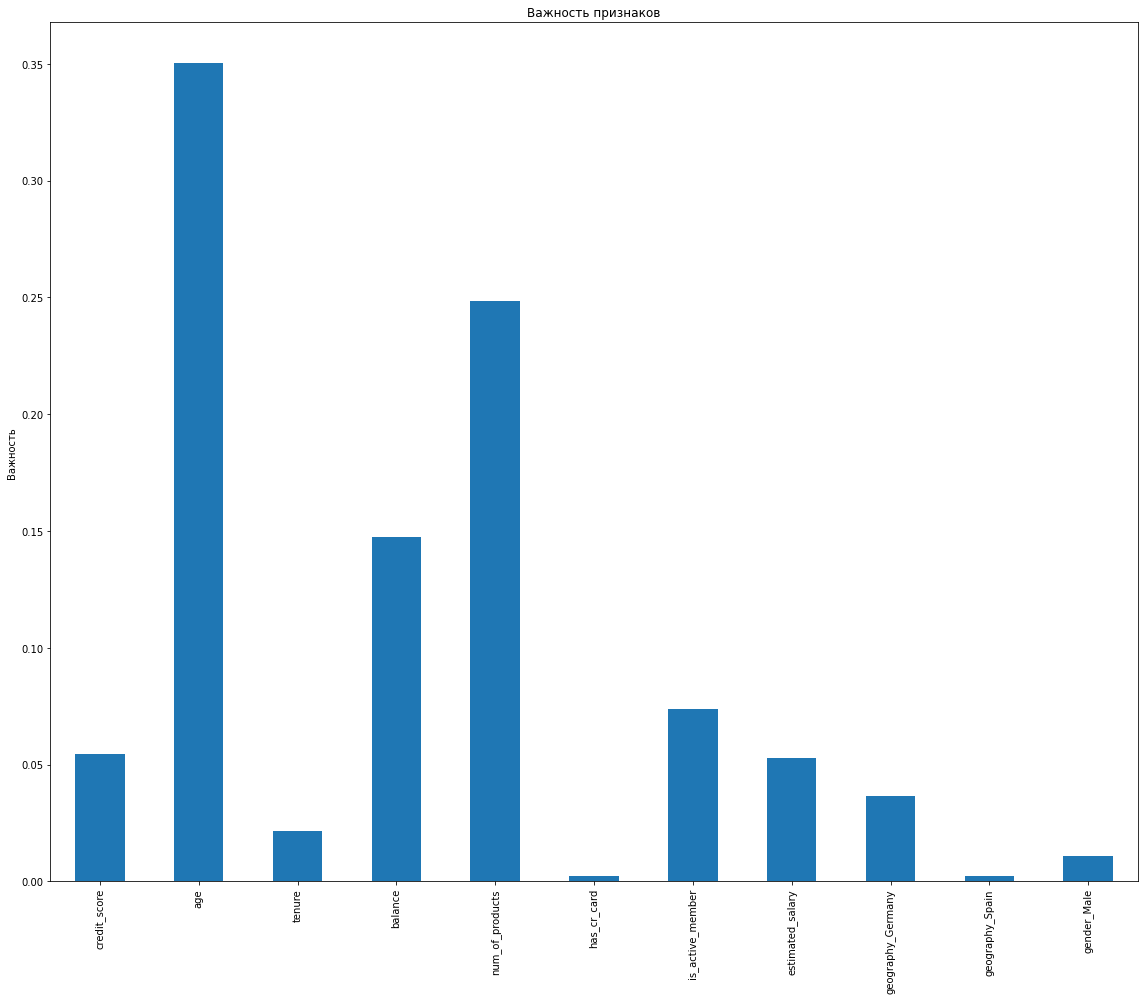

In [187]:
imp = pd.Series(model.feature_importances_,
                         data.drop(['exited','row_number','customer_id','surname'] , axis=1).columns)

fig, ax = plt.subplots(figsize=(16,14))
imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Вывод - подготовили данные, исследовали обучение моделей при несбалансированности, качество моделей оказалось чуть выше случайных, устранили дисбаланс сэмплированием, качество резко повысилось, наилучшая модель - дерево решений с максимальной глубиной в 9. F1 на тестовом множестве составила 0.58, а AUC-ROC составила 0.80, что является хорошим результатом.

Большое значение на уход с банка имеют такие факторы как возраст клиента, баланс на счете и количество продуктов банка, которыми он пользуется.

# <font color='orange'>Рекомендации студентам GeekBrains для выполнения проекта 🔥</font>
* Анализ данных на python и pandas https://www.youtube.com/watch?v=dd3RcafdOQk&t=82s
* Курс "Введение в машинное обучение" https://stepik.org/course/4852
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результаты обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"